In [54]:
# Bibliotecas

import pandas as pd
import plotly.express as px

In [55]:
#Realizando a Leitura do arquivo csv.

df = pd.read_csv('zomato.csv')

In [56]:
#Criando cópia do DF.

df1 = df.copy()

In [57]:
#Funções:

COUNTRIES = {
1: "India",
14: "Australia",
30: "Brazil",
37: "Canada",
94: "Indonesia",
148: "New Zeland",
162: "Philippines",
166: "Qatar",
184: "Singapure",
189: "South Africa",
191: "Sri Lanka",
208: "Turkey",
214: "United Arab Emirates",
215: "England",
216: "United States of America",
}
def country_name(country_id):
    return COUNTRIES[country_id]



def create_price_tye(price_range):
    if price_range == 1:
        return "cheap"
    elif price_range == 2:
        return "normal"
    elif price_range == 3:
        return "expensive"
    else:
        return "gourmet"

In [58]:
#Alteração do tipo para string.
df1['Cuisines'] = df1['Cuisines'].astype( str )

#Recategorização da coluna de tipos de culinária.
df1['Cuisines'] = df1.loc[:, 'Cuisines'].apply(lambda x: x.split(",")[0])

#Preenchimento dos nomes dos Países.
df1['Country Code'] = df1['Country Code'].apply(country_name)

#Criação de Coluna com tipo de preço por barato, normal, caro e gourmet.
df1['Price Tye'] = df1['Price range'].apply(create_price_tye)

#Exclusão da coluna.
df1.drop('Switch to order menu', axis=1, inplace=True)


# QUESTÕES DE MAPEAMENTO GERAL

## 1. Quantos restaurantes únicos estão registrados?
Tem como finalidade informar o total de restaurantes únicos na base.
Método SAPE:
Saída: Exibir o valor total de restaurantes únicos contidos na base de dados.
Processo:  Utilizando a coluna com os nomes dos restaurantes poderei verificar a quantidade de restaurantes únicos:
Entrada: Utilizarei a função 'loc'; selecionarei todas as linhas da coluna 'Restaurant_Name'; aplicarei a função 'nunique().'

In [14]:
restaurantes_unicos = df1.loc[:, 'Restaurant ID'].nunique()
print(f'O total de restaurantes únicos é de {restaurantes_unicos}.')

O total de restaurantes únicos é de 6942.


## 2. Quantos países únicos estão registrados?
Tem como finalidade informar o total de países únicos dentro da base de dados.
Método SAPE:
Saída: Exibir o valor total de países únicos contidos na base de dados.
Processo:  Utilizando a coluna com os códigos dos países poderei verificar a quantidade de países únicos:
Entrada: Utilizarei a função 'loc'; selecionarei todas as linhas da coluna 'Country Code'; aplicarei a função 'nunique().'

In [15]:
paises_unicos = df1.loc[:, 'Country Code'].nunique()
print(f'O total de países únicos é de {paises_unicos}.')

O total de países únicos é de 15.


## 3. Quantas cidades únicas estão registradas?
Tem como finalidade informar o total de cidades únicas dentro da base de dados

In [7]:
cidades_unicas = df1.loc[:, 'City'].nunique()
print(f'O total de cidades únicas é de {cidades_unicas}.')

O total de cidades únicas é de 125.


## 4. Qual o total de avaliações feitas?
Tem como finalidade informar o número total de avaliações realizadas pelos clientes.

In [9]:
total_avaliacoes = df1.loc[:, 'Votes'].sum()
print(f'O número total de avaliações é de {total_avaliacoes}.')

O número total de avaliações é de 4639654.


## 5. Qual o total de tipos de culinária registrados?
Tem como finalidade informar quais são os tipos de culinária e a quantidade de tipos.

In [27]:
tipos_culinaria = df1.loc[:, 'Cuisines'].nunique()
print(f'O total de tipos de culinária é de {tipos_culinaria}.')


O total de tipos de culinária é de 166.


# VISÃO PAÍSES

## 1. Qual o nome do país que possui mais cidades registradas?

In [46]:
pais_mais_cidades_cadastradas = df1.loc[:, ['City','Country Code']].groupby(['Country Code']).nunique().sort_values('City', ascending=False).reset_index()
pais_mais_cidades_cadastradas


Country Code  City
0                      India    49
1   United States of America    22
2                Philippines    12
3               South Africa    12
4                    England     5
5                 New Zeland     4
6       United Arab Emirates     4
7                  Australia     3
8                     Brazil     3
9                     Canada     3
10                 Indonesia     3
11                    Turkey     2
12                     Qatar     1
13                 Singapure     1
14                 Sri Lanka     1

## 2. Qual o nome do país que possui mais restaurantes registrados?

In [45]:
pais_mais_restaurantes_cadastradas = df1.loc[:, ['Restaurant ID','Country Code']].groupby(['Country Code']).nunique().sort_values('Restaurant ID', ascending=False).reset_index()
pais_mais_restaurantes_cadastradas

Country Code  Restaurant ID
0                      India           3120
1   United States of America           1378
2                    England            400
3               South Africa            346
4       United Arab Emirates            300
5                     Brazil            240
6                 New Zeland            239
7                  Australia            180
8                     Canada            180
9                     Turkey            159
10                 Indonesia             80
11               Philippines             80
12                     Qatar             80
13                 Singapure             80
14                 Sri Lanka             80

## 3. Qual o nome do país que possui mais restaurantes com o nível de preço igual a 4 registrados?

In [48]:
linhas_selecionadas = df1['Price range'] == 4
pais_restaurantes_range_quatro = df1.loc[linhas_selecionadas, ['Restaurant ID', 'Country Code', 'Price range']].groupby(['Country Code', 'Price range']).count().sort_values('Restaurant ID', ascending=False).reset_index()
pais_restaurantes_range_quatro

Country Code  Price range  Restaurant ID
0   United States of America            4            420
1               South Africa            4            237
2                      India            4            210
3                     Brazil            4            159
4       United Arab Emirates            4            122
5                    England            4             83
6                 New Zeland            4             81
7                      Qatar            4             63
8                     Turkey            4             62
9                  Singapure            4             59
10                    Canada            4             54
11                 Australia            4             33
12               Philippines            4             23
13                 Indonesia            4             18
14                 Sri Lanka            4             18

## 4. Qual o nome do país que possui a maior quantidade de tipos de culinária distintos?

In [13]:
pais_com_mais_tipos_culinaria = df1.loc[:, ['Cuisines', 'Country Code']].groupby(['Country Code']).nunique().sort_values('Cuisines', ascending=False).reset_index()
pais_com_mais_tipos_culinaria

Country Code  Cuisines
0                      India        78
1   United States of America        75
2                    England        52
3       United Arab Emirates        46
4                  Australia        43
5                     Brazil        43
6                     Canada        42
7               South Africa        42
8                 New Zeland        37
9                      Qatar        31
10                    Turkey        28
11                 Sri Lanka        26
12                 Indonesia        21
13                 Singapure        21
14               Philippines        14

## 5. Qual o nome do país que possui a maior quantidade de avaliações feitas?
Apresentar o páis que possuí a maior quantidade de avaliações.
Por meio da coluna de identificador de restaurantes e da colunas de votos, será possível realizar um agrupamento pela dimensão votos, desta forma podemos  verificar o país que mais teve avaliações agrupando essas avaliações.
Inicialmente utilizaremos a função 'loc', selecionaremos todas as linhas das colunas 'Country Code', 'Votes', agruparemos pela coluna 'Country Code', utilizaremos a função 'sum'.

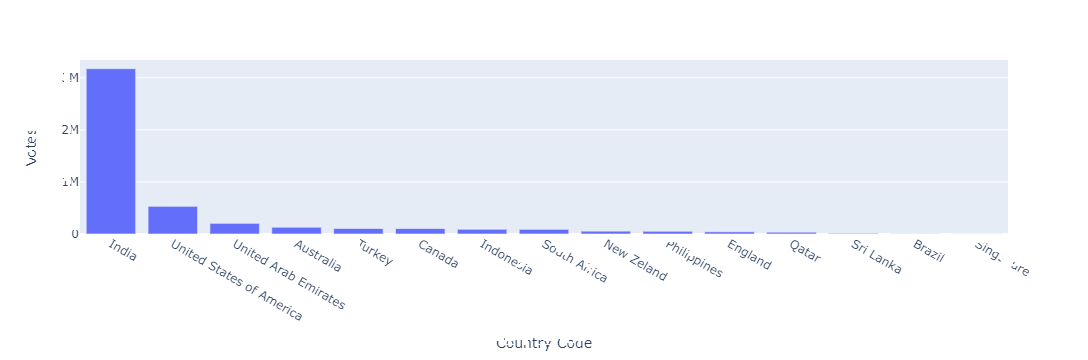

In [11]:
country_most_votes = df1.loc[:, ['Country Code', 'Votes']].groupby(['Country Code']).sum().sort_values('Votes', ascending=False).reset_index()
px.bar(country_most_votes, x='Country Code', y='Votes')

## 6. Qual o nome do país que possui a maior quantidade de restaurantes que fazem entrega?
A questão acima busca identificar o nome do 'PAÍS' que possuí a mior  quantidade de 'RESTAURANTES' que fazem 'ENTREGAS'.
Exibir um gráfico de barras com o nome dos Países em ordem decrescente, do maior para o menor, que possuem maior quantidade de restaurantes que fazem entregas.
Para resolução deste problema, iremos utilizar as informações contidas na coluna de 'Restaurantes que fazem entrega' e a coluna que identifica os 'Restaurantes'. Devemos isolar apenas os restaurante que fazem entregas, criando uma condição; com base nessa condição, devemos contar a quantidade de restaurantes os dividindo por seus respectivos países. Tendo essas informações, poderemos criar um gráfico, para melhor visualização.
Inicialmente, iremos criar uma condição, por meio da função 'loc', selecionaremos todas as linhas da coluna 'Has Online delivery', que sejam iguais a '1' que corresponde a restaurantes que fazem entregas. Em seguida, utilizaremos a função 'loc', porém colocaremos as linhas onde criamos a condição anteriormente, pois precisamos apenas dos restaurantes que fazem entregas; selecionaremos a coluna 'Country Code', 'Has Online delivery', utilizaremos a função 'groupby', e agruparemos pela coluna 'Country Code', pois queremos que os restaurantes sejam contados pela dimensão dos países; em seguida utilizaremos a função 'count', para contar os restaurantes.

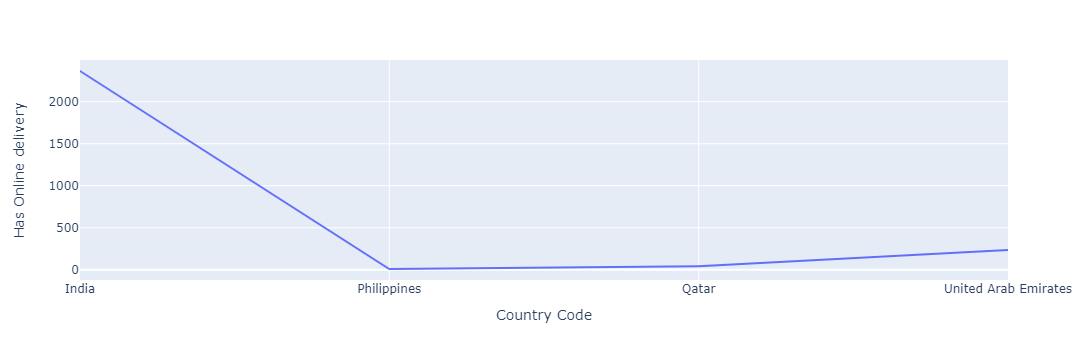

In [13]:
linhas_selecionada = df1.loc[:, 'Has Online delivery'] == 1

delivery_online = df1.loc[linhas_selecionada, ['Country Code', 'Has Online delivery']].groupby(['Country Code']).count().reset_index()

px.line(delivery_online, x='Country Code', y='Has Online delivery')

## 7. Qual o nome do país que possui a maior quantidade de restaurantes que aceitam reservas?
A questão acima, deseja evidenciar o NOME do PAÍS que possuí a MAIOR QUANTIDADE (valor), de RESTAURANTES que aceitam reservas.
Iremos evidenciar uma tabela contendo a lista de PAÍSES e a respectiva quantidade (valores) de restaurantes que aceitam reservas.
Inicialmente precisamos verificar uma coluna que identifique quais restaurantes aceitam reservas; em seguida precisamos, separar por meio de uma condição apenas os restaurantes que aceitam reservas; desta forma poderemos com relacionar com a coluna de países, com o objetivo de evidenciar por meio de uma contagem a quantidade de resturantes por país que aceitam reservas, para melhor visualização acredito que um gráfico cai bem.
Inicialmente, iremos selecionar nossa condição, utilizaremos a função 'loc', selecionaremos todas as linhas da coluna 'Has Table booking', e criaremos a condição == 1; por meio da função 'loc', colocamos as linhas selecionadas por meio da condição feita acima, e colocaremos as colunas 'Has Table booking', 'Country Code', utilizaremos a função 'groupby', e agruparemos pela coluna 'Country Code', em seguida utilizaremos a função 'count'.

In [20]:
linhas_selecionadas = df1.loc[:, 'Has Table booking'] == 1
df1.loc[linhas_selecionadas, ['Has Table booking', 'Country Code']].groupby(['Country Code']).count().sort_values('Has Table booking', ascending=False).reset_index()

Country Code  Has Table booking
0                      India                291
1                    England                 58
2                  Australia                 29
3                Philippines                 28
4                 New Zeland                 19
5                  Indonesia                 14
6       United Arab Emirates                 12
7                      Qatar                  5
8                     Turkey                  5
9               South Africa                  3
10  United States of America                  3
11                 Sri Lanka                  1

## 8. Qual o nome do país que possui, na média, a maior quantidade de avaliações registrada?
O objetivo desta questão é evidenciar o páis que na média a maior quantidade de avaliações.
Para realizar essa análise, será necessário utilizar a coluna de países, juntamente com a coluna de avaliações, para evidenciarmos uma média.
Utilize a função 'loc', selecionae todas as linhas das colunas 'código dos países' e ' availiações', utilize a função 'groupby' pela dimensão 'código dos países', utiliza a função 'mean', resete o índice.

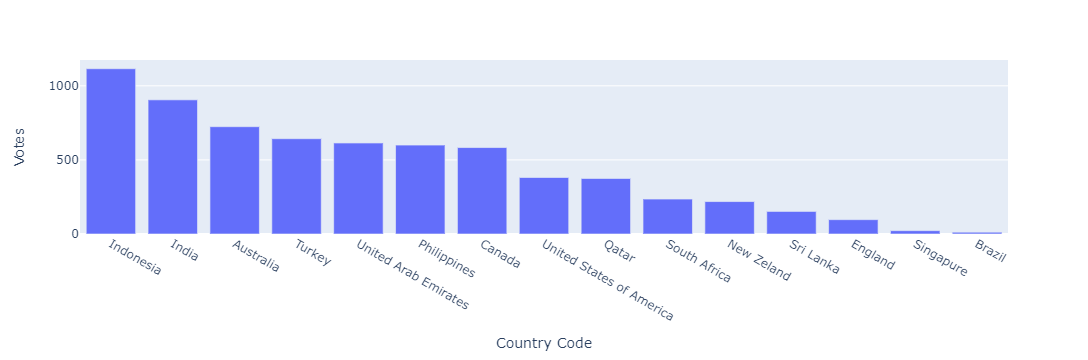

In [12]:
mean_votes_countries = df1.loc[:, ['Country Code', 'Votes']].groupby(['Country Code']).mean().sort_values('Votes', ascending=False).reset_index()
px.bar(mean_votes_countries, x='Country Code', y='Votes')

## 9. Qual o nome do país que possui, na média, a maior nota média registrada?
O obejtivo desta questão é indentificar a média das notas médias por países, desta forma podemos indentificar o páis com maior média.
Vamos elabora um gráfico com a média de todos os páises do maior para o menor.
Para realizar essa análise, iremos utilizar a coluna de código dos países, e a coluna de notas médias; desta forma podemos aplicar uma função de média sobre a coluna de avaliação média, e obter a média por países.
Usar função 'loc', selecionar todas as linhas, utilizar as colunas 'Country Code' e 'Aggregate rating', utilizar função 'groupby' pela dimensão 'Country Code', utilizar a função 'mean', em seguida ordenar com a função 'sort_values', para finalizar, utilizar o 'reset_index. Criar um gráfico de acordo com a necessidade.

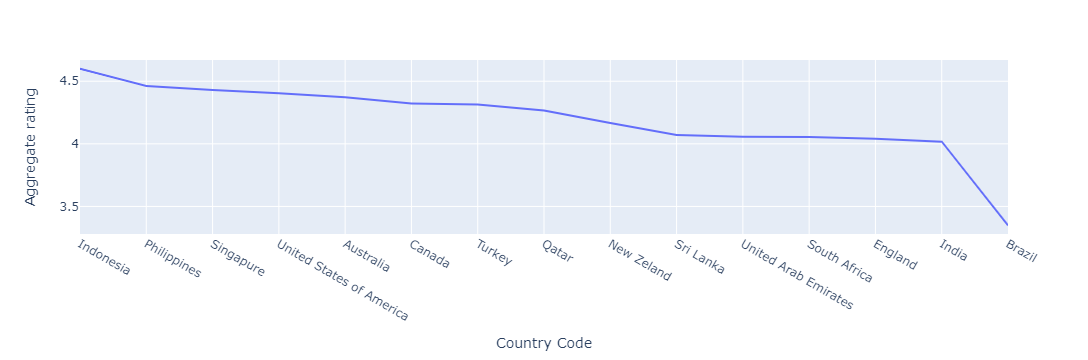

In [15]:
highest_rating_by_country = df1.loc[:, ['Country Code', 'Aggregate rating']].groupby(['Country Code']).mean().sort_values('Aggregate rating', ascending=False).reset_index()
px.line(highest_rating_by_country, x='Country Code', y='Aggregate rating')

## 10. Qual o nome do país que possui, na média, a menor nota média registrada?
O obejtivo desta questão é indentificar a média das notas médias por países, desta forma podemos indentificar o páis com maior média.
Vamos elabora um gráfico com a média de todos os páises do maior para o menor.
Para realizar essa análise, iremos utilizar a coluna de código dos países, e a coluna de notas médias; desta forma podemos aplicar uma função de média sobre a coluna de avaliação média, e obter a média por países.
Usar função 'loc', selecionar todas as linhas, utilizar as colunas 'Country Code' e 'Aggregate rating', utilizar função 'groupby' pela dimensão 'Country Code', utilizar a função 'mean', em seguida ordenar com a função 'sort_values', para finalizar, utilizar o 'reset_index. Criar um gráfico de acordo com a necessidade.

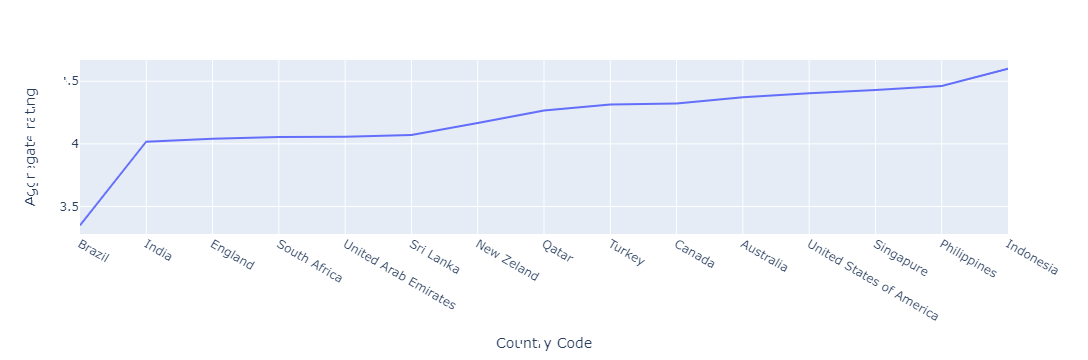

In [16]:
lower_rating_by_country = df1.loc[:, ['Country Code', 'Aggregate rating']].groupby(['Country Code']).mean().sort_values('Aggregate rating', ascending=True).reset_index()
px.line(lower_rating_by_country, x='Country Code', y='Aggregate rating')

## 11. Qual a média de preço de um prato para dois por país?
O objetivo desta questão é identificar o valor médio geral do prato pra dois por cada país.
Para apresentar essa questão, irei fazer um gráfico de barras com os preços médios por mais.
Para verificar o preço médio por páis, é necessário utilizar a coluna com o nome dos países, e a coluna com custo médio do prato pra dois; por meio destas colunas, posso realizar uma média, desta forma terei o custo médio por páis.
Utilizar a função 'loc', selecionar todas as linhas das colunas 'Average Cost for two' e 'Country Code', utilizar a função 'groupby' pela dimensão 'Country Code', aplicar a função 'mean', utilizar a função 'sort_values' para ordenar do maior para o menor; utilizar a função 'reset_index'; criar o cráfico de barras, utilizar 'px.bar'.

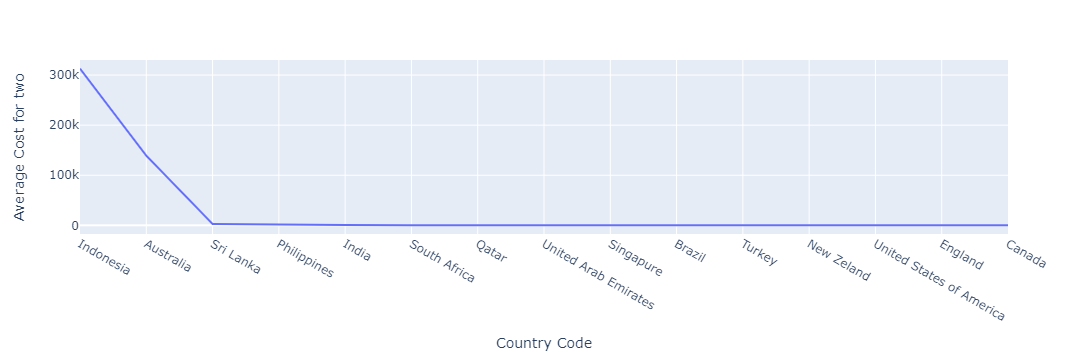

In [38]:
mean_cost_for_two = df1.loc[:, ['Average Cost for two', 'Country Code']].groupby(['Country Code']).mean().sort_values('Average Cost for two', ascending=False).reset_index()
px.line(mean_cost_for_two, x='Country Code', y='Average Cost for two')


# VISÃO CIDADES

## 1. Qual o nome da cidade que possui mais restaurantes registrados?

Para identificar o nome da cidade que possuí a maior quantidade de restaurantes registrados.
Vamos apresentar uma tabela com o nome das cidades que tem a maior quantidade de restaurante registrados.
Por meio da coluna de restaurantes, e por meio da coluna de cidades, podemos definir através de uma contadem dos restaurantes, qual cidade em ordem decrescente possuí mais restaurante registrados.

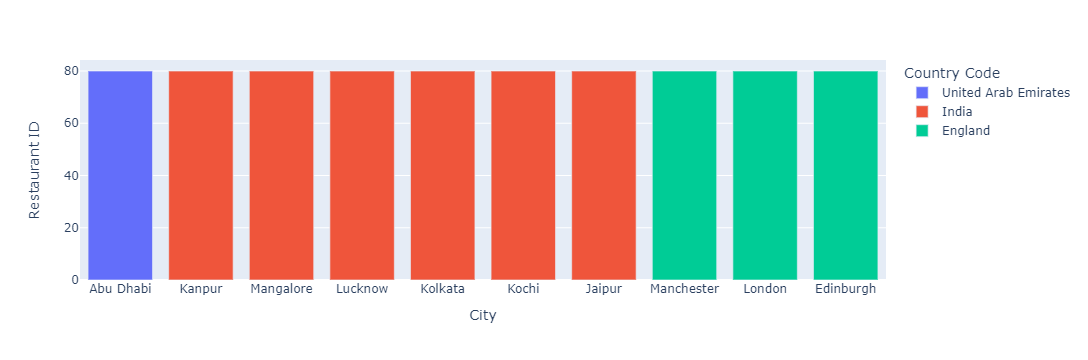

In [56]:
city_many_restaurants = df1.loc[:, ['Restaurant ID', 'City', 'Country Code']].groupby(['City', 'Country Code']).nunique().sort_values('Restaurant ID', ascending=False).reset_index()
fig = city_many_restaurants.head(10)
px.bar(fig, x='City', y='Restaurant ID', color='Country Code')

## 2. Qual o nome da cidade que possui mais restaurantes com nota média acima de 4?

Nesta questão, iremos evidenciar as 'cidades' que possuem 'restaurantes' com nota 'média' acima de 4.
Iremos apresentar um gráfico de barras com o nome das cidades e suas respectivas avaliações.
Para obtermos essas informações, vamos precisar utilizar a coluna de cidades, a coluna de restaurantes e coluna de avaliações, por meio das colunas de cidades e restaurantes, evidenciaremos uma média dos restaurantes que tem notas acima de 4.
Utilizar a função 'loc', selecionar todas as linhas das colunas 'City', 'Restaurant ID', e 'Aggregate rating', utilizar a função 'groupbar' por 'City', 'Restaurant ID', utilizar a função 'nunique' e a função 'mean.

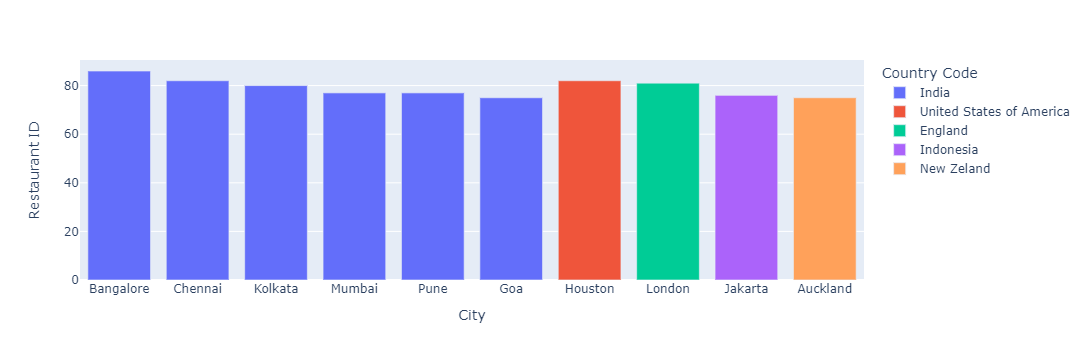

In [60]:
highest_rating = df1.loc[df1['Aggregate rating'] > 4, ['Country Code', 'City', 'Restaurant ID']].groupby(['Country Code', 'City']).count().sort_values('Restaurant ID', ascending=False).reset_index()
fig = highest_rating.head(10)
px.bar(fig, x='City', y='Restaurant ID', color ='Country Code')

## 3. Qual o nome da cidade que possui mais restaurantes com nota média abaixo de 2.5?

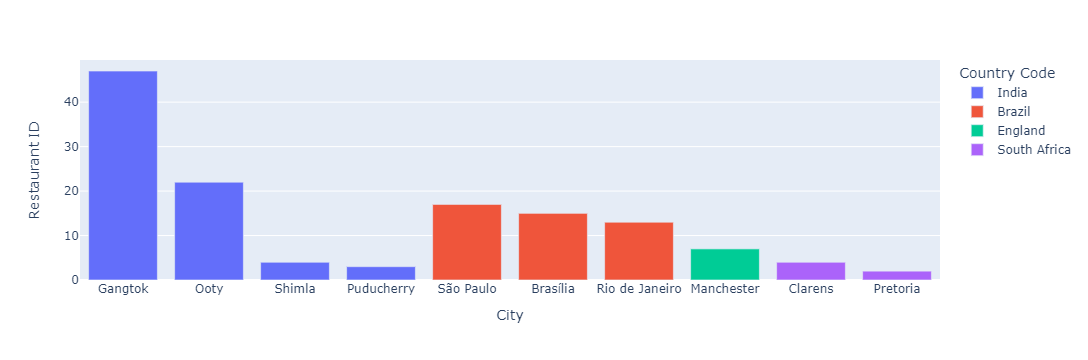

In [61]:
lowest_rating = df1.loc[df1['Aggregate rating'] < 2.5, ['Country Code', 'City', 'Restaurant ID']].groupby(['Country Code', 'City']).count().sort_values('Restaurant ID', ascending=False).reset_index()
fig = lowest_rating.head(10)
px.bar(fig, x='City', y='Restaurant ID', color ='Country Code')

## 4. Qual o nome da cidade que possui o maior valor médio de um prato para dois?


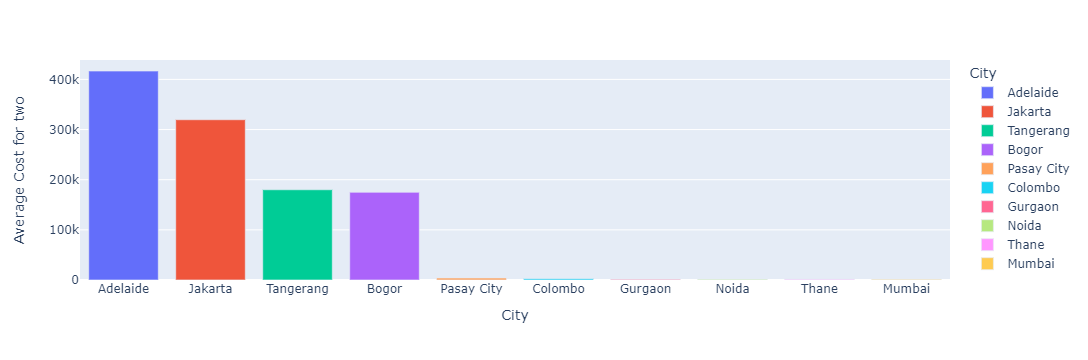

In [78]:
average_by_plate = df1.loc[:, ['City', 'Average Cost for two']].groupby(['City']).mean().sort_values('Average Cost for two', ascending=False).reset_index()
fig = average_by_plate.head(10)
px.bar(fig, x='City', y='Average Cost for two', color='City')

## 5. Qual o nome da cidade que possui a maior quantidade de tipos de culinária distintas?

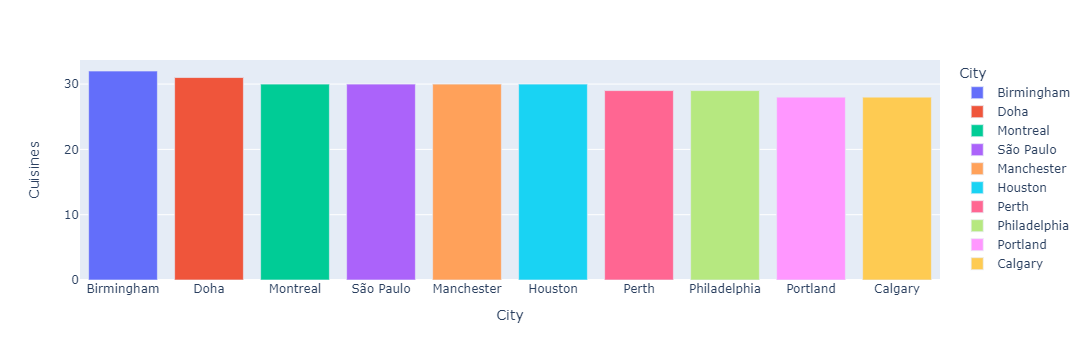

In [74]:
top_city_cuisines = df1.loc[:, ['City', 'Cuisines']].groupby(['City']).nunique().sort_values('Cuisines', ascending=False).reset_index()
fig = top_city_cuisines.head(10)
px.bar(fig, x='City', y='Cuisines', color='City')

## 6. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem reservas?

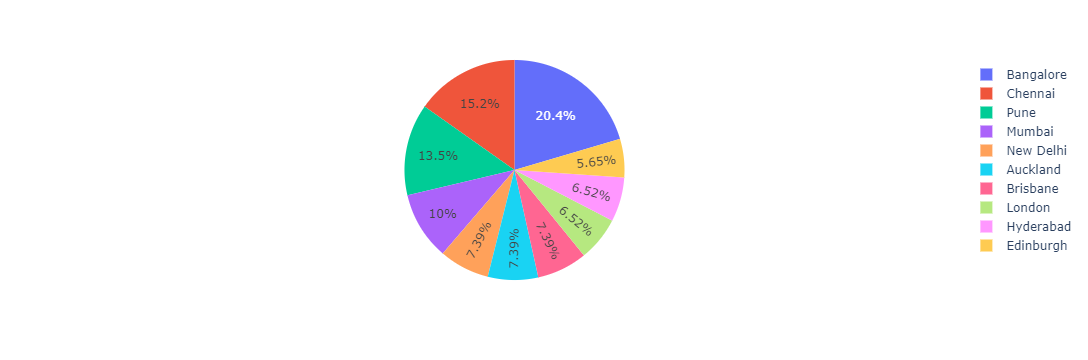

In [85]:
restaurant_booking = df1.loc[df1['Has Table booking'] == 1, ['City', 'Restaurant ID']].groupby(['City']).count().sort_values('Restaurant ID', ascending=False).reset_index()
fig =restaurant_booking.head(10)
px.pie(fig, values='Restaurant ID', names='City', color='City')

## 7. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem entregas?

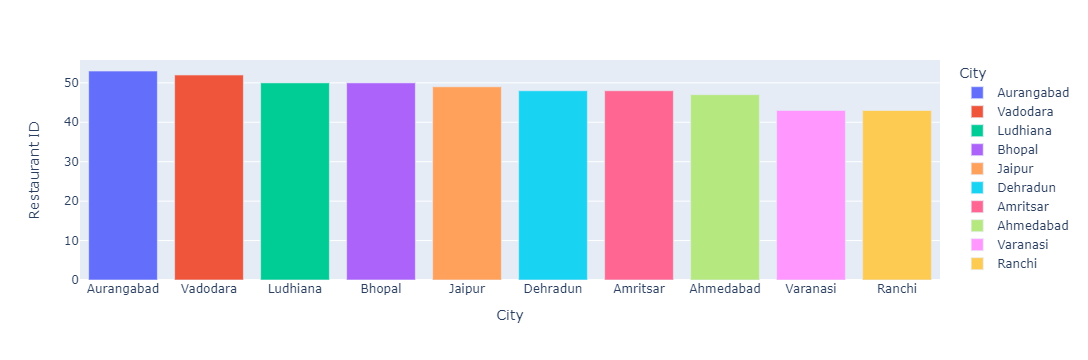

In [100]:
delivering_restaurants = df1.loc[df1['Is delivering now'] == 1, ['City', 'Restaurant ID', 'Country Code']].groupby(['City']).count().sort_values('Restaurant ID', ascending=False).reset_index()
fig = delivering_restaurants.head(10)
px.bar(fig, x='City', y='Restaurant ID', color='City')

## 8. Qual o nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online?

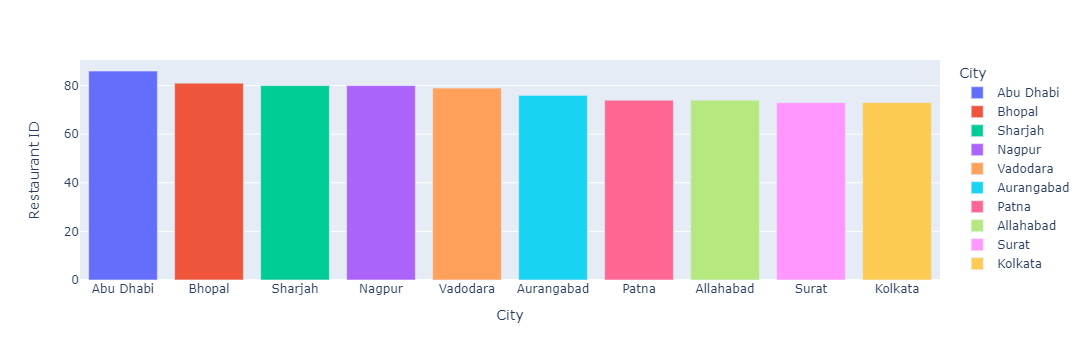

In [107]:

online_delivery = df1.loc[df1['Has Online delivery'] == 1, ['City', 'Restaurant ID']].groupby(['City']).count().sort_values('Restaurant ID', ascending=False).reset_index()
fig = online_delivery.head(10)
px.bar(fig, x='City', y='Restaurant ID', color='City')

# VISÃO RESTAURANTES

## 1. Qual o nome do restaurante que possui a maior quantidade de avaliações?

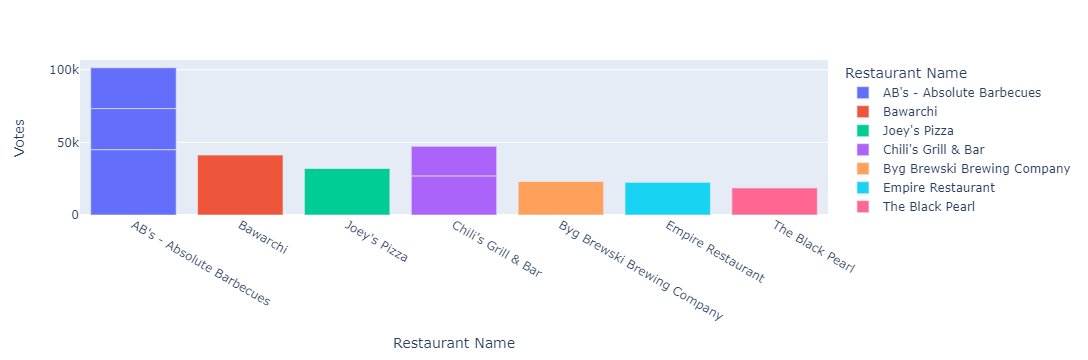

In [46]:
restaurant_by_votes = df1.loc[:, ['Restaurant Name', 'Votes', 'City']].groupby(['Restaurant Name', 'City']).sum().sort_values('Votes', ascending=False).reset_index()
fig = restaurant_by_votes.head(10)
px.bar(fig, x='Restaurant Name', y='Votes', color='Restaurant Name')

## 2. Qual o nome do restaurante com a maior nota média?

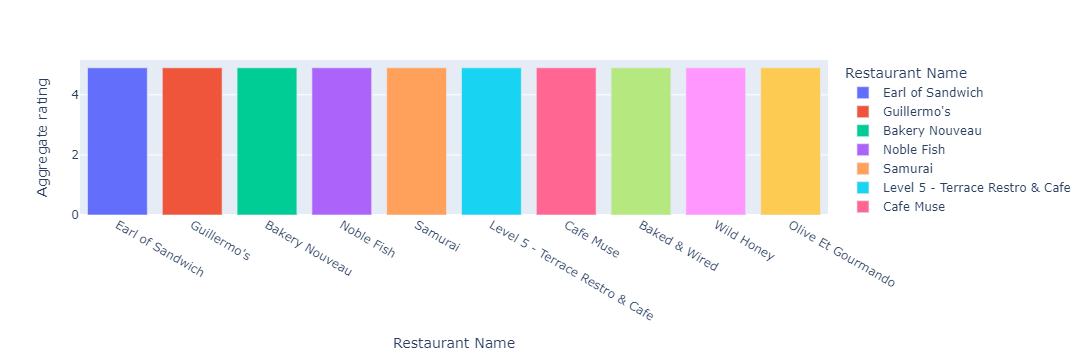

In [47]:
top_rating_by_restaurant = df1.loc[:, ['Restaurant Name', 'Aggregate rating']].groupby(['Restaurant Name']).mean().sort_values('Aggregate rating', ascending=False).reset_index()
fig = top_rating_by_restaurant.head(10)
px.bar(fig, x='Restaurant Name', y='Aggregate rating', color='Restaurant Name')

## 3. Qual o nome do restaurante que possui o maior valor de um prato para duas pessoas?

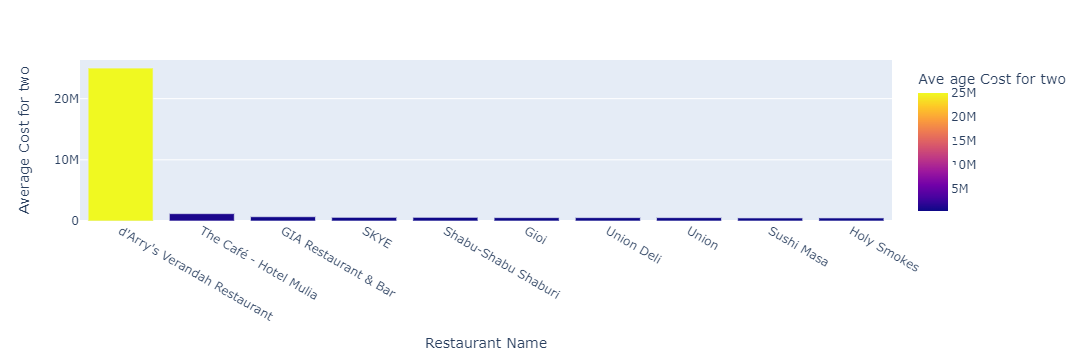

In [65]:
highest_value = df1.loc[:, ['Restaurant Name', 'Average Cost for two']].groupby(['Restaurant Name']).max().sort_values('Average Cost for two', ascending=False).reset_index()
fig = highest_value.head(10)
px.bar(fig, x='Restaurant Name', y='Average Cost for two', color='Average Cost for two')

## 4. Qual o nome do restaurante de tipo de culinária brasileira que possui a menor média de avaliação?

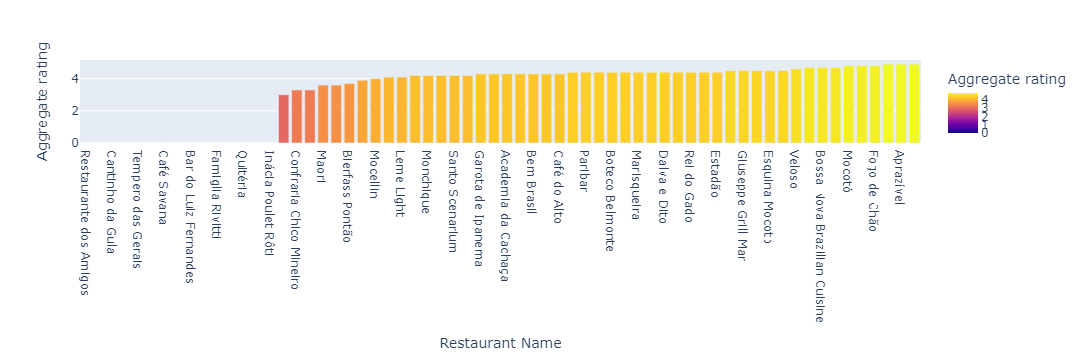

In [35]:
menor_media = (df1.loc[df1['Cuisines'] == 'Brazilian', ['Restaurant Name', 'Aggregate rating']].groupby(['Restaurant Name'])
                                                                                                .min()
                                                                                                .sort_values('Aggregate rating', ascending=True)
                                                                                                .reset_index())
fig = menor_media
px.bar(fig, x='Restaurant Name', y='Aggregate rating', color='Aggregate rating' )

In [31]:
df1.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code             object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking         int64
Has Online delivery       int64
Is delivering now         int64
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Price Tye                object
dtype: object

In [34]:
df1['Cuisines'].unique()

array(['Italian', 'European', 'Filipino', 'American', 'Korean', 'Pizza',
       'Taiwanese', 'Japanese', 'Coffee', 'Chinese', 'Seafood',
       'Singaporean', 'Vietnamese', 'Latin American', 'Healthy Food',
       'Cafe', 'Fast Food', 'Brazilian', 'Argentine', 'Arabian', 'Bakery',
       'Tex-Mex', 'Bar Food', 'International', 'French', 'Steak',
       'German', 'Sushi', 'Grill', 'Peruvian', 'North Eastern',
       'Ice Cream', 'Burger', 'Mexican', 'Vegetarian', 'Contemporary',
       'Desserts', 'Juices', 'Beverages', 'Spanish', 'Thai', 'Indian',
       'Mineira', 'BBQ', 'Mongolian', 'Portuguese', 'Greek', 'Asian',
       'Author', 'Gourmet Fast Food', 'Lebanese', 'Modern Australian',
       'African', 'Coffee and Tea', 'Australian', 'Middle Eastern',
       'Malaysian', 'Tapas', 'New American', 'Pub Food', 'Southern',
       'Diner', 'Donuts', 'Southwestern', 'Sandwich', 'Irish',
       'Mediterranean', 'Cafe Food', 'Korean BBQ', 'Fusion', 'Canadian',
       'Breakfast', 'Cajun', 'Ne

## 5. Qual o nome do restaurante de tipo de culinária brasileira, e que é do Brasil, que possui a maior média de avaliação?

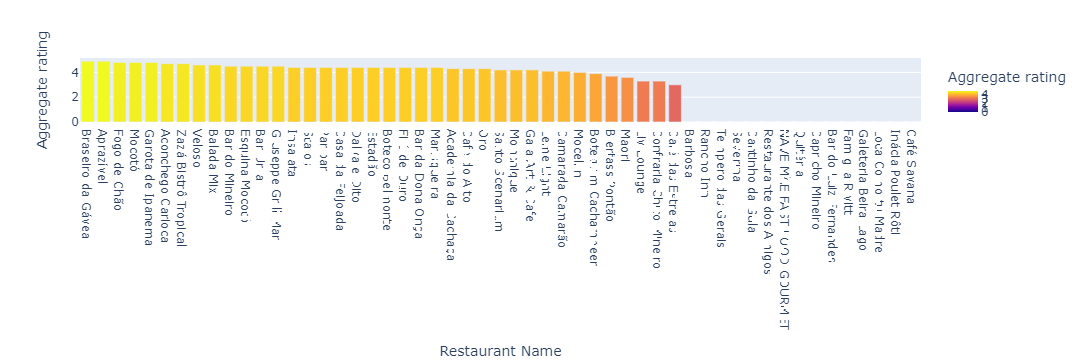

In [40]:
maior_media = (df1.loc[(df1['Country Code'] == 'Brazil') & (df1['Cuisines'] == 'Brazilian'), ['Restaurant Name', 'Aggregate rating']].groupby(['Restaurant Name'])
                                                                                                .max()
                                                                                                .sort_values('Aggregate rating', ascending=False)
                                                                                                .reset_index())
fig = maior_media
px.bar(fig, x='Restaurant Name', y='Aggregate rating', color='Aggregate rating' )

## 6. Os restaurantes que aceitam pedido online são também, na média, os restaurantes que mais possuem avaliações registradas?

In [80]:
pedidos_online = df1.loc[df1['Has Online delivery'] == 1, 'Votes'].mean()
nao_pedidos_online = df1.loc[df1['Has Online delivery'] == 0, 'Votes'].mean()
print(f'A média de avaliação dos restaurantes que fazem pedidos online é de {pedidos_online}, maior que a média dos restaurantes que não têm pedidos online que é de {nao_pedidos_online}.')

A média de avaliação dos restaurantes que fazem pedidos online é de 843.0275160196004, maior que a média dos restaurantes que não têm pedidos online que é de 493.0451374640952.
